In [22]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [23]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_AW_1.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [24]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	5
float64		column 2	0
float64		column 3	0
float64		column 4	10
float64		column 5	5
float64		column 6	5
float64		column 7	15
float64		column 8	10
float64		column 9	10
float64		column 10	10
float64		column 11	16
float64		column 12	0
float64		column 13	5
float64		column 14	15
float64		column 15	15
float64		column 16	10
float64		column 17	15
float64		column 18	10
float64		column 19	0
float64		column 20	10
float64		column 21	30
float64		column 22	0
float64		column 23	26
float64		column 24	20
float64		column 25	66
float64		column 26	100
float64		column 27	0
float64		column 28	131
float64		column 29	90
float64		column 30	115
float64		column 31	76
float64		column 32	131
float64		column 33	10
float64		column 34	161
float64		column 35	106
float64		column 36	126
float64		column 37	10
float64		column 38	15
float64		column 39	15
float64		column 40	141
float64		column 41	15
float64		column 42	51
float64		column 43	45
float64		column 44	30
float

In [25]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4592.000000,4597.000000,4597.000000,4587.000000,4592.000000,4592.000000,4582.000000,4587.000000,4587.000000,4587.000000,...,4587.000000,4522.000000,4567.000000,4572.000000,4582.000000,4557.000000,4527.000000,4537.000000,4506.000000,4516.000000
mean,0.104739,0.213200,0.280433,0.065625,0.312628,0.095895,0.113603,0.105548,0.090120,0.239850,...,0.031966,0.038930,0.137203,0.016962,0.268563,0.075548,0.044062,5.215011,49.662672,281.754207
std,0.305625,1.291121,0.504121,1.397275,0.673048,0.273993,0.389318,0.401645,0.278727,0.645625,...,0.286165,0.245427,0.230846,0.109580,0.815673,0.245901,0.431546,31.947655,126.688235,591.345541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.590000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.277000,15.000000,95.000000
75%,0.000000,0.000000,0.420000,0.000000,0.390000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.313750,0.052000,0.000000,3.705000,43.000000,266.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,5.277000,4.081000,32.478000,6.003000,19.829000,1102.500000,2204.000000,15841.000000


<AxesSubplot:>

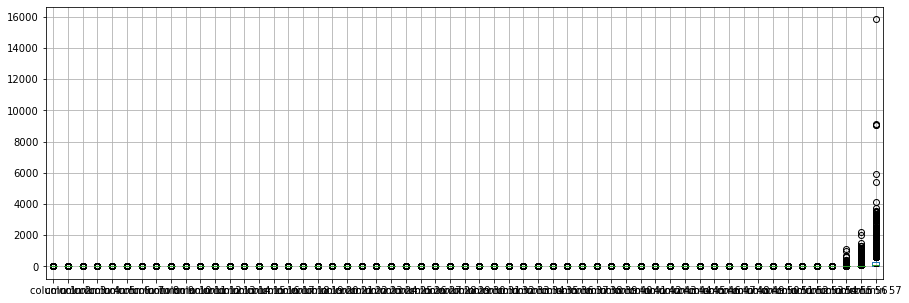

In [26]:
df.boxplot(return_type='axes', figsize=(15,5))

In [27]:
df.mean()

column 1       0.104739
column 2       0.213200
column 3       0.280433
column 4       0.065625
column 5       0.312628
column 6       0.095895
column 7       0.113603
column 8       0.105548
column 9       0.090120
column 10      0.239850
column 11      0.059520
column 12      0.541884
column 13      0.093898
column 14      0.058090
column 15      0.049380
column 16      0.249396
column 17      0.141921
column 18      0.185064
column 19      1.661710
column 20      0.085577
column 21      0.809974
column 22      0.121307
column 23      0.102153
column 24      0.094317
column 25      0.553533
column 26      0.262579
column 27      0.767973
column 28      0.125981
column 29      0.098318
column 30      0.103592
column 31      0.064209
column 32      0.047100
column 33      0.097526
column 34      0.048064
column 35      0.105531
column 36      0.097159
column 37      0.136898
column 38      0.013053
column 39      0.078955
column 40      0.065016
column 41      0.043339
column 42      0

In [28]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.016847,0.065873,0.013244,0.022935,0.059661,0.008492,-0.003974,0.106282,0.040874,...,-0.017820,-0.026721,-0.022200,-0.033358,0.058624,0.116136,-0.008606,0.044579,0.100827,0.093207
column 2,-0.016847,1.000000,-0.033469,-0.006941,-0.023886,-0.024770,0.004391,-0.016333,-0.003978,0.032943,...,-0.015804,-0.007395,-0.057013,-0.018449,-0.014394,-0.009853,0.002047,0.001961,0.003286,-0.023405
column 3,0.065873,-0.033469,1.000000,-0.020283,0.078043,0.087950,0.038180,0.011865,0.094437,0.031997,...,-0.026368,-0.033677,-0.014470,-0.034760,0.108889,0.088141,-0.002702,0.096927,0.175725,0.072988
column 4,0.013244,-0.006941,-0.020283,1.000000,0.003222,-0.010042,0.020000,0.010226,-0.002487,-0.005019,...,-0.001902,-0.000660,-0.014474,-0.007162,-0.003143,0.010949,-0.000308,0.005200,0.027632,0.022098
column 5,0.022935,-0.023886,0.078043,0.003222,1.000000,0.054089,0.149494,0.029206,0.020247,0.034328,...,-0.032138,-0.032781,-0.050451,-0.026058,0.025771,0.042535,0.002416,0.052959,0.091487,0.003657
column 6,0.059661,-0.024770,0.087950,-0.010042,0.054089,1.000000,0.060769,0.079436,0.116916,0.013891,...,-0.031731,-0.019291,-0.007562,-0.015012,0.066054,0.107102,0.020401,-0.010444,0.145609,0.085091
column 7,0.008492,0.004391,0.038180,0.020000,0.149494,0.060769,1.000000,0.039422,0.044008,0.054247,...,-0.034144,-0.033116,-0.058494,-0.027386,0.054529,0.070471,0.047073,0.037474,0.094354,-0.008186
column 8,-0.003974,-0.016333,0.011865,0.010226,0.029206,0.079436,0.039422,1.000000,0.105417,0.082967,...,-0.021363,-0.027685,-0.035341,-0.019627,0.031360,0.056971,-0.007827,0.011458,0.060607,0.043093
column 9,0.106282,-0.003978,0.094437,-0.002487,0.020247,0.116916,0.044008,0.105417,1.000000,0.129315,...,-0.026112,-0.016117,-0.033360,0.013926,0.043914,0.148640,-0.000244,0.111794,0.296247,0.256313
column 10,0.040874,0.032943,0.031997,-0.005019,0.034328,0.013891,0.054247,0.082967,0.129315,1.000000,...,-0.016453,0.012022,0.007592,0.007547,0.037041,0.076167,0.045436,0.073692,0.167319,0.089940


In [29]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [30]:
imputer = md.Midas(layer_structure = [17,17+78,17+78+78,17+78+78+78,17+78+78,17+78,17], vae_layer = False, seed = 780)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 662.8452608859498
Epoch: 1 , loss: 657.5180514664601
Epoch: 2 , loss: 661.7266081168676
Epoch: 3 , loss: 655.4256030358504
Epoch: 4 , loss: 652.1565315166832
Epoch: 5 , loss: 657.515267242538
Epoch: 6 , loss: 651.9024698078009
Epoch: 7 , loss: 651.9183392142585
Epoch: 8 , loss: 656.9598924590321
Epoch: 9 , loss: 647.0279841938085
Epoch: 10 , loss: 581.3875681647855
Epoch: 11 , loss: 527.6573355538504
Epoch: 12 , loss: 500.43002521368686
Epoch: 13 , loss: 487.8668659489329
Epoch: 14 , loss: 469.92390306319925
Epoch: 15 , loss: 450.684770564169
Epoch: 16 , loss: 445.6412127292115
Epoch: 17 , loss: 438.3197469678075
Epoch: 18 , loss: 431.10944797103826
Epoch: 19 , loss: 431.5772785093726
Epoch: 20 , loss: 438.48423272641276
Epoch: 21 , loss: 430.6484597767687
Epoch: 22 , loss: 446.11914642014983
Epoch: 23 , loss: 444.8577760171392
Epoch: 24 , loss: 430.5007450489217
Epoch: 25 , loss: 433.1468305953288
Epo

In [31]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [32]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000
column 2      0.000
column 3      0.000
column 4      0.000
column 5      0.000
column 6      0.000
column 7      0.000
column 8      0.000
column 9      0.000
column 10     0.000
column 11     0.000
column 12     0.000
column 13     0.000
column 14     0.000
column 15     0.000
column 16     0.000
column 17     0.000
column 18     0.000
column 19     0.000
column 20     0.000
column 21     0.000
column 22     0.000
column 23     0.000
column 24     0.000
column 25     0.000
column 26     0.000
column 27     0.000
column 28     0.000
column 29     0.000
column 30     0.000
column 31     0.000
column 32     0.000
column 33     0.000
column 34     0.000
column 35     0.000
column 36     0.000
column 37     0.000
column 38     0.000
column 39     0.000
column 40     0.000
column 41     0.000
column 42     0.000
column 43     0.000
column 44     0.000
column 45     1.440
column 46     0.000
column 47     0.000
column 48     0.000
column 49     0.000
column 50     0.196


In [33]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [34]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4593,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [35]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [36]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [37]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

14057.34321084155

In [38]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [39]:
NRMS=numerator/denominator
NRMS


0.2962018961175636

In [40]:
new_df.iloc[66,:]

column 1       0.000
column 2       0.440
column 3       0.890
column 4       0.000
column 5       0.440
column 6       0.000
column 7       0.000
column 8       0.000
column 9       0.000
column 10      0.000
column 11      0.000
column 12      0.440
column 13      0.000
column 14      0.000
column 15      0.000
column 16      0.440
column 17      0.000
column 18      0.890
column 19      2.240
column 20      0.000
column 21      1.340
column 22      0.000
column 23      0.000
column 24      0.000
column 25      0.000
column 26      0.000
column 27      0.000
column 28      0.000
column 29      0.000
column 30      0.000
column 31      0.000
column 32      0.000
column 33      0.000
column 34      0.000
column 35      0.000
column 36      0.000
column 37      0.000
column 38      0.000
column 39      0.000
column 40      0.000
column 41      0.000
column 42      0.000
column 43      0.000
column 44      0.000
column 45      0.440
column 46      0.000
column 47      0.000
column 48    

In [41]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [42]:
imputations[-1].to_excel("Spam_AW_1(imp).xlsx", index=False, header=False)